In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import time
from collections import Counter
from math import sqrt
import seaborn as sns
from tqdm import tqdm
import random
from pandas.core.algorithms import unique

In [2]:
df = pd.read_csv('mushrooms.csv')
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


### Función para calcular el número de atributos y los atributos contenidos en el dataframe

In [3]:
def Numero_atributos(df_na):
    num_atributos_ = df_na.shape[1]    #número de columnas
    atributos_ = list(df_na.columns)   #extrae columnas-->lista

    print(f'El dataset tiene {num_atributos_} atributos:')
    
    for i in range(num_atributos_):   
        print(f'{i+1}.- {atributos_[i]} ')
    return num_atributos_, atributos_

#### Función para obtener los atributos, sus observaciones y el tipo de atributo

In [4]:
def Observaciones(df_o, atributos_o):
    observaciones_ = {}
    for i, atributo in enumerate(atributos_o):
        obs_ = df_o[atributo].value_counts() #Return a Series containing counts of unique values.
        obs_l_ = list(obs_.index)            #Lista de los valores únicos encontrados
        obs_ = pd.DataFrame(obs_.index)      

        tipo = df_o[atributo].dtypes

        if tipo == 'object': tipo = 'categórico'
        elif tipo == 'int': tipo = 'entero'
        elif tipo == 'float64': tipo = 'flotante'

        print(f'''El atributo {atributo} es de tipo {tipo}, contiene {len(obs_l_)} observaciones y son las siguientes:
        {obs_l_}
              ''')
        observaciones_.update({atributo:obs_})    
    return observaciones_

#### Función para calcular el número de instancias

In [5]:
def Numero_instancias(df_ni):
    num_instancias_ = df_ni.shape[0]
    print(f'El dataset tiene {num_instancias_} instancias')
    return num_instancias_

#### Función para conocer el número de datos faltantes

In [6]:
def Datos_Faltantes(df_):
    faltantes_df = df_.isnull().sum()
    print(f'Datos faltantes por atributo:\n {faltantes_df}')
    #return faltantes_df

In [7]:
def Distribucion(df_, atributo_, atributo_d):
  fig, ax = plt.subplots(figsize = (10,8))
  sns.histplot(data = df_, x = atributo_,ax = ax, kde=True, element = 'step')
  plt.title(f'Distribución de {atributo_}', fontsize = 18)
  ax.set_xlabel(atributo_)
  ax.set_ylabel("Frequencia")
  plt.show()

In [8]:
num_atributos, atributos = Numero_atributos(df)

El dataset tiene 23 atributos:
1.- class 
2.- cap-shape 
3.- cap-surface 
4.- cap-color 
5.- bruises 
6.- odor 
7.- gill-attachment 
8.- gill-spacing 
9.- gill-size 
10.- gill-color 
11.- stalk-shape 
12.- stalk-root 
13.- stalk-surface-above-ring 
14.- stalk-surface-below-ring 
15.- stalk-color-above-ring 
16.- stalk-color-below-ring 
17.- veil-type 
18.- veil-color 
19.- ring-number 
20.- ring-type 
21.- spore-print-color 
22.- population 
23.- habitat 


In [9]:
num_instancias = Numero_instancias(df)

El dataset tiene 8124 instancias


In [10]:
observaciones = Observaciones(df, atributos)

El atributo class es de tipo categórico, contiene 2 observaciones y son las siguientes:
        ['e', 'p']
              
El atributo cap-shape es de tipo categórico, contiene 6 observaciones y son las siguientes:
        ['x', 'f', 'k', 'b', 's', 'c']
              
El atributo cap-surface es de tipo categórico, contiene 4 observaciones y son las siguientes:
        ['y', 's', 'f', 'g']
              
El atributo cap-color es de tipo categórico, contiene 10 observaciones y son las siguientes:
        ['n', 'g', 'e', 'y', 'w', 'b', 'p', 'c', 'u', 'r']
              
El atributo bruises es de tipo categórico, contiene 2 observaciones y son las siguientes:
        ['f', 't']
              
El atributo odor es de tipo categórico, contiene 9 observaciones y son las siguientes:
        ['n', 'f', 'y', 's', 'a', 'l', 'p', 'c', 'm']
              
El atributo gill-attachment es de tipo categórico, contiene 2 observaciones y son las siguientes:
        ['f', 'a']
              
El atributo gil

In [11]:
Datos_Faltantes(df)

Datos faltantes por atributo:
 class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


In [12]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

## Funciones estadísticas

In [13]:
def moda(atributo_):
    moda_1 = atributo_.value_counts()
    moda_ = list(moda_1.index)
    return moda_[0]

In [14]:
def maximo(columna_):
  r = len(columna_)
  valor_maximo_ = columna_[0]
  for n in range(1, r):
    k = columna_[n]
    if valor_maximo_ < k:
      valor_maximo_ = k
  return valor_maximo_

In [15]:
def minimo(columna_):
  r = len(columna_)
  valor_minimo_ = columna_[0]
  for n in range(1, r):
    k = columna_[n]
    if valor_minimo_ > k:
      valor_minimo_ = k
  return valor_minimo_

In [16]:
def media(columna_):
  r = len(columna_)
  sumatoria = 0
  for i in range(r):
    sumatoria += columna_[i]
  media_ = sumatoria / r
  return media_

In [17]:
def desviacion_estandar(columna_): #s
  r = len(columna_)
  media_columna = media(columna_)
  sumatoria = 0
  for i in range(r):
    s = columna_[i] - media_columna
    s = s**2
    sumatoria += s
  s = sumatoria / (r - 1)
  s = s ** (1/2)
  return s

In [18]:
def varianza(columna_): #s2
  r = len(columna_)
  media_columna = media(columna_)
  sumatoria = 0
  for i in range(r):
    s = columna_[i] - media_columna
    s = s**2
    sumatoria += s
  s_2 = sumatoria / (r - 1)
  return s_2

In [19]:
def estadistica(atributo_):
  mod = moda(atributo_)
  max = maximo(atributo_)
  min = minimo(atributo_)
  med = media(atributo_)
  std = desviacion_estandar(atributo_)
  var = varianza(atributo_)
  return mod, max, min, med, std, var

In [20]:
def cuartiles(df_, atributo_):
#1. 25% de los datos es menor que o igual a este valor.
#2. La mediana. 50% de los datos es menor que o igual a este valor.
#3. 75% de los datos es menor que o igual a este valor.
#rango intercuartil. La distancia entre el primer 1er cuartil y el 3er 
#cuartil (Q3-Q1); de esta manera, abarca el 50% central de los datos.

#ordenar los elementos de la columna
  v = df_[atributo_]
  v = np.asarray(v.sort_values())
  n = len(v)
  if n % 2 == 0:
 
    #calcular cuartil uno 
    a = int(n/4) 
    q1 = v[a]
    #calcular cuartil dos
    b = (n)/2
    c = b - 1
    q2 = (v[b] + v[c])/2
    #calcular cuartil tres
    d = int((3*n)/4)
    q3 = v[d]
  else:

    #calcular cuartil dos
    b = int(n/2)
    q2 = v[b]
    
    if b % 2 == 0:
      #calcular cuartil uno 
      a = int(n/4) 
      q1 = (v[a] + v[a-1])/2
      #calcular cuartil tres 
      d = int((3*(n))/4) 
      q3 = (v[a] + v[d-1])/2
    else:

      #calcular cuartil uno 
      a = int(n/4) 
      q1 = v[a]
      #calcular cuartil tres
      d = int((3*n)/4)
      q3 = v[d]

  print(f'Q1: {q1}, Q2: {q2}, Q3: {q3}')
  return q1, q2, q3

In [21]:
def outlier(df_,atributo_):
  v = df_[atributo_]
  q1, q2, q3 = cuartiles(df_,atributo_)
  out = []
  for valor in v:
    if valor < q1:
      if abs(valor-q1) > 1.5*(q3-q1):
        out.append(valor)
    if valor > q3:
      if abs(valor-q3) > 1.5*(q3-q1):
        out.append(valor)
    
  if len(out) == 0:
    print(f'No existen valores atípicos en el atributo {atributo_}')
  else:
    print(f'Se encontraron {len(out)} valores atípicos')
    print(f'Los valores atípicos encontrados son: {np.asarray(out)}')
  return out

In [22]:
def Balance_clases(df):

  atributo_d = input('¿Cuál es tu atributo de decisión?:')
  clases = df[atributo_d]
  cl = clases.value_counts() 
  cl_ = list(cl.index)

  porcentajes_ = (cl*100)/sum(cl)
  print(porcentajes_)

  print(f'El dataset cuenta con {len(cl_)} clases y son las siguientes: {cl_}')

In [23]:
Balance_clases(df)

¿Cuál es tu atributo de decisión?: class


e    51.797144
p    48.202856
Name: class, dtype: float64
El dataset cuenta con 2 clases y son las siguientes: ['e', 'p']


### Valor faltante ? --> Nan

In [24]:
df['stalk-root'] = df['stalk-root'].replace('?', np.NaN)

In [25]:
df['stalk-root'].isnull().sum()

2480

Calcular porcentaje de valores faltantes

In [26]:
df.isnull().sum()/df.shape[0]*100

class                        0.000000
cap-shape                    0.000000
cap-surface                  0.000000
cap-color                    0.000000
bruises                      0.000000
odor                         0.000000
gill-attachment              0.000000
gill-spacing                 0.000000
gill-size                    0.000000
gill-color                   0.000000
stalk-shape                  0.000000
stalk-root                  30.526834
stalk-surface-above-ring     0.000000
stalk-surface-below-ring     0.000000
stalk-color-above-ring       0.000000
stalk-color-below-ring       0.000000
veil-type                    0.000000
veil-color                   0.000000
ring-number                  0.000000
ring-type                    0.000000
spore-print-color            0.000000
population                   0.000000
habitat                      0.000000
dtype: float64

Distribución de atributo con valores faltantes

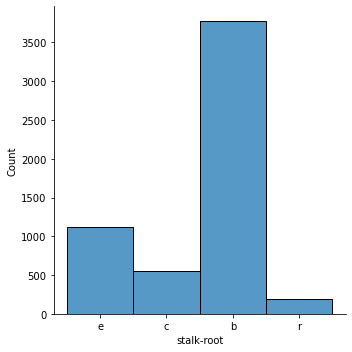

In [27]:
sns.displot(df['stalk-root'])

## Imputación aleatoria

In [28]:
def imputacion_aleatoria(df_aleat, atributo_):
    df_a = df_aleat.copy()
    faltantes_df = df_a[atributo_].isnull().sum()
    no_faltantes = df_a[df_a[atributo_].notnull()]

    min = no_faltantes[atributo_].min()
    max = no_faltantes[atributo_].max()
    
    tipo = df_a[atributo_].dtypes
    print(tipo)
    if tipo == 'O': 
      random_string_list = []
      for i, atributo in enumerate(atributo_):
        obs_ = df_a[atributo_].value_counts() #Return a Series containing counts of unique values.
        obs_l_ = list(obs_.index)            #Lista de los valores únicos encontrados
      for i in range(faltantes_df):
        x = random.choices(obs_l_)
       # random_string_list.append(x)
      #df_a.loc[df_a[atributo_].isnull(),atributo_] = random_string_list
        df_a.loc[df_a[atributo_].isnull(),atributo_] = x
   
    elif tipo == 'int64': 
      
      random_int_list = []
      for i in range(faltantes_df):
        x = random.radint(min,max)
        random_int_list.append(x)
      df_a.loc[df_a[atributo_].isnull(),atributo_] = random_int_list

    elif tipo == 'float64': 
    
      random_float_list = []
      for i in range(faltantes_df):
        x = round(random.uniform(min,max),2)
        random_float_list.append(x)
      df_a.loc[df_a[atributo_].isnull(),atributo_] = random_float_list

    return df_a


In [29]:
df['stalk-root']

0         e
1         c
2         c
3         e
4         e
       ... 
8119    NaN
8120    NaN
8121    NaN
8122    NaN
8123    NaN
Name: stalk-root, Length: 8124, dtype: object

In [30]:
df_imp_aleat = imputacion_aleatoria(df,'stalk-root')

object


In [31]:
df_imp_aleat['stalk-root']

0       e
1       c
2       c
3       e
4       e
       ..
8119    e
8120    e
8121    e
8122    e
8123    e
Name: stalk-root, Length: 8124, dtype: object

### Distribución posterior a la imputación aleatoria

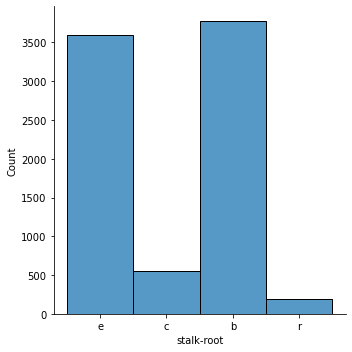

In [32]:
sns.displot(df_imp_aleat['stalk-root'])

In [33]:
df_imp_aleat['stalk-root'].isnull().sum()

0

In [34]:
df_n = df_imp_aleat.copy()

In [35]:
df_n.isnull().sum()/df_n.shape[0]*100

class                       0.0
cap-shape                   0.0
cap-surface                 0.0
cap-color                   0.0
bruises                     0.0
odor                        0.0
gill-attachment             0.0
gill-spacing                0.0
gill-size                   0.0
gill-color                  0.0
stalk-shape                 0.0
stalk-root                  0.0
stalk-surface-above-ring    0.0
stalk-surface-below-ring    0.0
stalk-color-above-ring      0.0
stalk-color-below-ring      0.0
veil-type                   0.0
veil-color                  0.0
ring-number                 0.0
ring-type                   0.0
spore-print-color           0.0
population                  0.0
habitat                     0.0
dtype: float64

# Codificación categórico-numérico

In [36]:
columnas = df_n.columns.values
elementos_columnas = {}

for c in columnas:
    elementos_columnas[c] = df_n[c].unique()

In [37]:
for c in columnas:
    if c != 'veil-type':
        df_n[c] = df_imp_aleat[c].replace(elementos_columnas[c],
                          np.arange(elementos_columnas[c].shape[0]))
    else:
        df_n['veil-type'] = df_imp_aleat['veil-type'].replace('p',1)
  
df_n.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,1,1,1
2,1,1,0,2,0,2,0,0,1,1,...,0,0,0,1,0,0,0,1,1,2
3,0,0,1,2,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,3,1,3,0,1,1,0,...,0,0,0,1,0,0,1,1,2,1
5,1,0,1,1,0,1,0,0,1,1,...,0,0,0,1,0,0,0,0,1,1
6,1,1,0,2,0,1,0,0,1,2,...,0,0,0,1,0,0,0,0,1,2
7,1,1,1,2,0,2,0,0,1,1,...,0,0,0,1,0,0,0,1,0,2
8,0,0,1,2,0,0,0,0,0,3,...,0,0,0,1,0,0,0,0,3,1
9,1,1,0,1,0,1,0,0,1,2,...,0,0,0,1,0,0,0,0,0,2


In [38]:
df_n.describe()[1:].style.background_gradient(cmap='Blues')

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
mean,0.517971,1.637617,0.971935,2.093550,0.584441,3.589365,0.025849,0.161497,0.690793,4.274249,0.567208,1.068932,0.660758,0.994584,1.149680,1.061546,1.000000,0.038405,0.082718,0.696209,2.200886,2.687839,2.794682
std,0.499708,1.588969,0.775534,1.744794,0.492848,1.557709,0.158695,0.368011,0.462195,2.669652,0.495493,0.998916,0.908808,1.333097,1.563541,1.648595,0.000000,0.257837,0.291116,0.786930,1.742226,1.381200,1.617549
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,0.000000,0.000000,1.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,3.000000,3.000000,3.000000
75%,1.000000,3.000000,2.000000,3.000000,1.000000,4.000000,0.000000,0.000000,1.000000,6.000000,1.000000,2.000000,2.000000,3.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,4.000000,4.000000,4.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,3.000000,3.000000,3.000000,8.000000,8.000000,1.000000,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


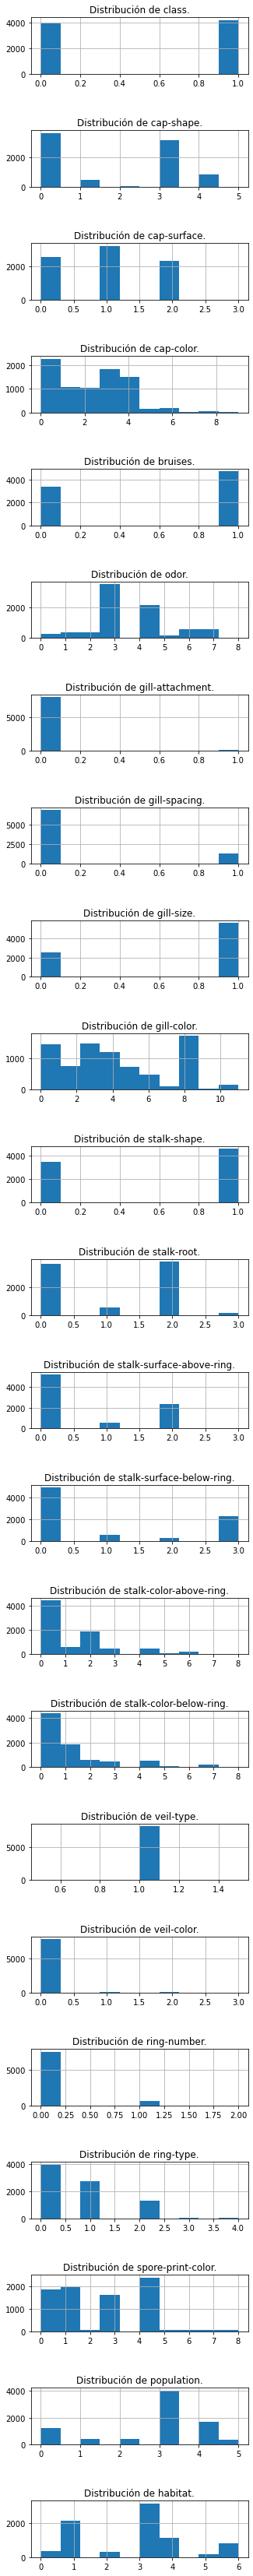

In [39]:
fig, axs = plt.subplots(df_n.shape[1], 1, figsize = (5,60))
plt.subplots_adjust(hspace = 1)
for i, c in enumerate(columnas):
  dist_datos = df_n[c]
  axs[i].set_title(f'Distribución de {c}.')
  axs[i].hist(dist_datos)
  axs[i].grid(True)

In [40]:
def norm_min_max(datos):
    lim_sup = []
    lim_inf = []
    rangoDatos =[]
    maxNorm = 1
    minNorm = 0
    rango = maxNorm - minNorm
    for i in range (0,datos.columns.size):
        lim_sup.append(datos.iloc[:,i].max())
        lim_inf.append(datos.iloc[:,i].min())
        rangoDatos.append(lim_sup[i] - lim_inf[i])
    nombres = datos.columns.values.tolist()
    datosNorm = pd.DataFrame(columns = nombres)

    for j in range(len(datos.columns)):
        varNorm = []
        var = datos.iloc[:,j]
        for i in range(len(datos)):
            D = var[i] - lim_inf[j]
            DPct = D/rangoDatos[j]
            dNorm = rango*DPct
            varNorm.append(minNorm+dNorm)
        datosNorm.iloc[:,j] = varNorm
    datos = datosNorm
    return datos

In [41]:
df_n

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,1,1,1
2,1,1,0,2,0,2,0,0,1,1,...,0,0,0,1,0,0,0,1,1,2
3,0,0,1,2,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,3,1,3,0,1,1,0,...,0,0,0,1,0,0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,4,0,0,1,3,1,0,1,10,...,0,6,7,1,2,0,0,8,5,6
8120,1,0,0,0,1,3,1,0,1,10,...,0,6,7,1,1,0,0,8,3,6
8121,1,3,0,0,1,3,1,0,1,1,...,0,6,7,1,2,0,0,8,5,6
8122,0,4,1,0,1,6,0,0,0,8,...,3,0,0,1,0,0,1,4,3,6


No se requiere normalizar, dado que, los valores numéricos son del tipo categórico

In [42]:
datos = norm_min_max(df_n)
datos

C:\Users\sleyv\AppData\Local\Temp\ipykernel_17820\1809094097.py:20: RuntimeWarning: invalid value encountered in longlong_scalars
  DPct = D/rangoDatos[j]


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0.0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.0,0.0,0.000000,...,0.0,0.00,0.000,NaN,0.000000,0.0,0.00,0.000,0.0,0.000000
1,1.0,0.0,0.000000,0.111111,0.0,0.125,0.0,0.0,1.0,0.000000,...,0.0,0.00,0.000,NaN,0.000000,0.0,0.00,0.125,0.2,0.166667
2,1.0,0.2,0.000000,0.222222,0.0,0.250,0.0,0.0,1.0,0.090909,...,0.0,0.00,0.000,NaN,0.000000,0.0,0.00,0.125,0.2,0.333333
3,0.0,0.0,0.333333,0.222222,0.0,0.000,0.0,0.0,0.0,0.090909,...,0.0,0.00,0.000,NaN,0.000000,0.0,0.00,0.000,0.0,0.000000
4,1.0,0.0,0.000000,0.333333,1.0,0.375,0.0,1.0,1.0,0.000000,...,0.0,0.00,0.000,NaN,0.000000,0.0,0.25,0.125,0.4,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1.0,0.8,0.000000,0.000000,1.0,0.375,1.0,0.0,1.0,0.909091,...,0.0,0.75,0.875,NaN,0.666667,0.0,0.00,1.000,1.0,1.000000
8120,1.0,0.0,0.000000,0.000000,1.0,0.375,1.0,0.0,1.0,0.909091,...,0.0,0.75,0.875,NaN,0.333333,0.0,0.00,1.000,0.6,1.000000
8121,1.0,0.6,0.000000,0.000000,1.0,0.375,1.0,0.0,1.0,0.090909,...,0.0,0.75,0.875,NaN,0.666667,0.0,0.00,1.000,1.0,1.000000
8122,0.0,0.8,0.333333,0.000000,1.0,0.750,0.0,0.0,0.0,0.727273,...,1.0,0.00,0.000,NaN,0.000000,0.0,0.25,0.500,0.6,1.000000


# PCA

Encontrar la matriz de covarianza y sus respectivos eigenvectores y eigenvalores 

In [43]:
def matriz_cov(data):
    atributos = data.columns 
    n = len(atributos)
    m = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            X = data[atributos[i]]
            Y = data[atributos[j]]
            m[i][j] = (((X-X.mean())*(Y-Y.mean())).sum())/(len(X)-1)
    return m

In [44]:
datos1 = df_n.drop(['class'],axis=1) #Eliminando el atributo de decisión 
#Ajustar los datos restando la media a cada atributo
datos_A = pd.DataFrame(columns=datos1.columns,index=range(len(datos1)))
for i in datos_A.columns:
    datos_A[i] = datos1[i] - datos1[i].mean()    
datos_A

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,-1.637617,-0.971935,-2.09355,-0.584441,-3.589365,-0.025849,-0.161497,-0.690793,-4.274249,-0.567208,...,-0.994584,-1.14968,-1.061546,0.0,-0.038405,-0.082718,-0.696209,-2.200886,-2.687839,-2.794682
1,-1.637617,-0.971935,-1.09355,-0.584441,-2.589365,-0.025849,-0.161497,0.309207,-4.274249,-0.567208,...,-0.994584,-1.14968,-1.061546,0.0,-0.038405,-0.082718,-0.696209,-1.200886,-1.687839,-1.794682
2,-0.637617,-0.971935,-0.09355,-0.584441,-1.589365,-0.025849,-0.161497,0.309207,-3.274249,-0.567208,...,-0.994584,-1.14968,-1.061546,0.0,-0.038405,-0.082718,-0.696209,-1.200886,-1.687839,-0.794682
3,-1.637617,0.028065,-0.09355,-0.584441,-3.589365,-0.025849,-0.161497,-0.690793,-3.274249,-0.567208,...,-0.994584,-1.14968,-1.061546,0.0,-0.038405,-0.082718,-0.696209,-2.200886,-2.687839,-2.794682
4,-1.637617,-0.971935,0.90645,0.415559,-0.589365,-0.025849,0.838503,0.309207,-4.274249,0.432792,...,-0.994584,-1.14968,-1.061546,0.0,-0.038405,-0.082718,0.303791,-1.200886,-0.687839,-1.794682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,2.362383,-0.971935,-2.09355,0.415559,-0.589365,0.974151,-0.161497,0.309207,5.725751,-0.567208,...,-0.994584,4.85032,5.938454,0.0,1.961595,-0.082718,-0.696209,5.799114,2.312161,3.205318
8120,-1.637617,-0.971935,-2.09355,0.415559,-0.589365,0.974151,-0.161497,0.309207,5.725751,-0.567208,...,-0.994584,4.85032,5.938454,0.0,0.961595,-0.082718,-0.696209,5.799114,0.312161,3.205318
8121,1.362383,-0.971935,-2.09355,0.415559,-0.589365,0.974151,-0.161497,0.309207,-3.274249,-0.567208,...,-0.994584,4.85032,5.938454,0.0,1.961595,-0.082718,-0.696209,5.799114,2.312161,3.205318
8122,2.362383,0.028065,-2.09355,0.415559,2.410635,-0.025849,-0.161497,-0.690793,3.725751,0.432792,...,2.005416,-1.14968,-1.061546,0.0,-0.038405,-0.082718,0.303791,1.799114,0.312161,3.205318


In [45]:
matrix = matriz_cov(datos_A)

<AxesSubplot:>

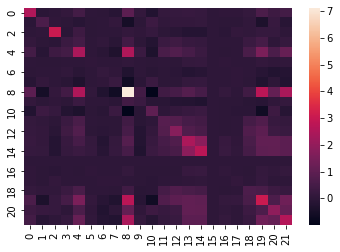

In [46]:
sns.heatmap(matrix)

In [47]:
L,V =  np.linalg.eig(matrix)

In [48]:
#Eigenvalores
L

array([1.25618213e+01, 5.25729595e+00, 3.14047394e+00, 2.87676818e+00,
       2.35173520e+00, 1.69606073e+00, 1.31016025e+00, 9.50283648e-01,
       8.35892769e-01, 7.05093740e-01, 5.85639476e-01, 4.34563930e-01,
       3.66191237e-01, 1.78545443e-01, 1.42088115e-01, 1.10380796e-01,
       9.35598420e-02, 4.92731926e-02, 4.58672867e-03, 1.78265003e-02,
       1.19536515e-02, 0.00000000e+00])

In [49]:
#Obtener el porcentaje de covarianza de cada uno de los atributos
total = L.sum()
p = (L/total)*100
columnas1 = datos_A.columns.values
for index, row in enumerate(p):
  print(columnas1[index] + ':',row)

cap-shape: 37.29735367473596
cap-surface: 15.609458327699489
cap-color: 9.324393687898906
bruises: 8.541423870494967
odor: 6.982546346966223
gill-attachment: 5.035780677259581
gill-spacing: 3.8900020121040235
gill-size: 2.821490962283899
gill-color: 2.481852548747483
stalk-shape: 2.093496629866053
stalk-root: 1.7388244993669075
stalk-surface-above-ring: 1.2902654942663678
stalk-surface-below-ring: 1.0872598605097281
stalk-color-above-ring: 0.530119985321959
stalk-color-below-ring: 0.4218743886735341
veil-type: 0.3277320604807516
veil-color: 0.27778889931463635
ring-number: 0.14629723228767819
ring-type: 0.01361847435288023
spore-print-color: 0.05292873305657571
population: 0.03549163431239753
habitat: 0.0


### PCA muesttra que los únicos atributos que aportan mayor información son 9 atributos: 

    cap-shape: 37.5403100553034
    cap-surface: 15.49650838093624
    cap-color: 9.413612604757668
    bruises: 8.587273366686254
    odor: 7.073368393649012
    gill-attachment: 4.915445438158239
    gill-spacing: 3.8172438990466664
    gill-size: 2.8772039959316706
    gill-color: 2.5127453073416723

In [50]:
df_pca = df_n[df_n.columns[1:10]]

In [51]:
df_pca

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color
0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,1,0
2,1,0,2,0,2,0,0,1,1
3,0,1,2,0,0,0,0,0,1
4,0,0,3,1,3,0,1,1,0
...,...,...,...,...,...,...,...,...,...
8119,4,0,0,1,3,1,0,1,10
8120,0,0,0,1,3,1,0,1,10
8121,3,0,0,1,3,1,0,1,1
8122,4,1,0,1,6,0,0,0,8


###  Datos de entrenamiento y prueba utilizando PCA

In [52]:
def method_8020(x,y):
  train_x = x[0 : int(len(x)*0.8)]
  train_y = y[0 : int(len(y)*0.8)]
  test_x = x[int(len(x)*0.8) : ]
  test_y = y[int(len(y)*0.8) : ]
  return train_x, train_y, test_x, test_y

In [53]:
y = datos['class']
train_x, train_y, test_x, test_y = method_8020(df_pca,y)

In [54]:
#train_x = train_x[:4000]
#train_y = train_y[:4000]
#test_x = test_x[:4000]
#test_y = test_y[:4000]

In [55]:
len(train_x)

6499

#### Matriz de confusión y métricas de evaluación

In [56]:
#Función que obtiene las métricas del algoritmo para su validación
def metricas(claseP,true_train):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    #Determinar los TP,TN,FP y FN para la matriz de confusión del entrenamiento 
    for i in range(len(claseP)):
        if (true_train[i] == claseP[i]) and true_train[i] == 1:
            TP += 1
        elif (true_train[i] == claseP[i]) and true_train[i] == 0:
            TN += 1
        elif (true_train[i] != claseP[i]) and true_train[i] == 0:
            FP += 1
        else:
            FN += 1
            
    accuracy = ((TP+TN)/(TP+TN+FP+FN))
   
    if TP + FP != 0:
        precision = TP/(TP+FP)
    else:
        precision = 0
    if TP + FN != 0:
        sensitividad = TP/(TP+FN)
    else:
        sensitividad = 0
    if precision != 0 and sensitividad != 0:
        f1 = (2*TP)/(2*TP+FP+FN)
    else:
        f1 = 0
    return [accuracy, precision, sensitividad, f1]

In [57]:
# Calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
	distance = 0.0 
	for i in range(len(row1)-1):										#for k in range(23)
		distance += (row1[i] - row2[i])**2
	return sqrt(distance)

In [58]:
def get_neighbors(k,distances_ord):
  neighbors = list()
  indices = list()
  for i in range(k):
    neighbors.append(distances_ord[i][0])
    indices.append(distances_ord[i][1])
  return neighbors,indices

In [59]:
def most_common(output_values):
    return max(set(output_values), key=output_values.count)

In [60]:
#entrenamiento del modelo
def predict_classification(x,y, k):
    predict = []
    for j in tqdm(range(0,len(x))):
        # Inicializacion de las distancias.
        distances = []
        x = np.array(x)
        for i ,example in enumerate(x):
            distance = euclidean_distance(example,x[j])# Calculate the Euclidean distance between two vectors
            distances.append((distance, i))
        distances.pop(j)
        distances_ord = sorted(distances)
        neighbors,indices = get_neighbors(k,distances_ord)
        output_values = y.iloc[indices]
        output_values = output_values.to_numpy().tolist()
        predict.append(most_common(output_values))
    return predict

## Clasificación KNN venenoso o no venonoso con PCA

In [61]:
error_rate = []

n = int(len(train_x)/20)
for k in range(2,10):
    pred_i = predict_classification(train_x.values.tolist(),train_y,k) 
    #print(pred_i)
    error_rate.append(np.mean(pred_i != train_y))

100%|██████████| 6499/6499 [03:40<00:00, 29.50it/s]


In [62]:
error_rate

[0.005077704262194184,
 0.006616402523465148,
 0.007539621480227727,
 0.007385751654100631,
 0.007231881827973534,
 0.007231881827973534,
 0.007231881827973534,
 0.007231881827973534]

Text(0, 0.5, 'Error Rate')

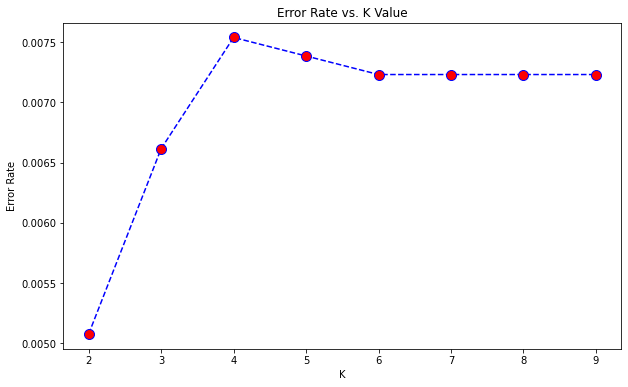

In [63]:
plt.figure(figsize=(10,6))
plt.plot(range(2,10),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [64]:
inicio = time.time()
train_pred = predict_classification(train_x.values.tolist(),train_y,5)
final = time.time()
print('Tiempo de entrenamiento:' + str(final-inicio))

100%|██████████| 6499/6499 [03:44<00:00, 28.92it/s]

Tiempo de entrenamiento:224.75022387504578


In [65]:
accuracy, precision, sensitividad, f1 = metricas(train_pred,np.array(train_y))

print('Exactitud: ',accuracy)
print('Precisión: ',precision)
print('Sensitividad: ',sensitividad)
print('f1 Score: ',f1)

Exactitud:  0.9926142483458994
Precisión:  0.9879775581084691
Sensitividad:  0.9991894082680357
f1 Score:  0.9935518538420204


In [66]:
y_pred= predict_classification(test_x.values.tolist(),test_y,5)

100%|██████████| 1625/1625 [00:13<00:00, 121.88it/s]


In [67]:
accuracy, precision, sensitividad, f1 = metricas(y_pred,np.array(test_y))

print('Exactitud: ',accuracy)
print('Precisión: ',precision)
print('Sensitividad: ',sensitividad)
print('f1 Score: ',f1)

Exactitud:  0.9987692307692307
Precisión:  0.9960707269155207
Sensitividad:  1.0
f1 Score:  0.9980314960629921


## Clasificación KNN venenoso o no venonoso SIN PCA

In [68]:
df_new = df_n.drop(['class'],axis=1) #Eliminando el atributo de decisión 

In [69]:
df_new

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,1,1
2,1,0,2,0,2,0,0,1,1,0,...,0,0,0,1,0,0,0,1,1,2
3,0,1,2,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,3,1,3,0,1,1,0,1,...,0,0,0,1,0,0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,4,0,0,1,3,1,0,1,10,0,...,0,6,7,1,2,0,0,8,5,6
8120,0,0,0,1,3,1,0,1,10,0,...,0,6,7,1,1,0,0,8,3,6
8121,3,0,0,1,3,1,0,1,1,0,...,0,6,7,1,2,0,0,8,5,6
8122,4,1,0,1,6,0,0,0,8,1,...,3,0,0,1,0,0,1,4,3,6


In [70]:
y = df_n['class']
train_x, train_y, test_x, test_y = method_8020(df_new,y)

In [71]:
train_x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,1,1
2,1,0,2,0,2,0,0,1,1,0,...,0,0,0,1,0,0,0,1,1,2
3,0,1,2,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,3,1,3,0,1,1,0,1,...,0,0,0,1,0,0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6494,3,1,4,1,4,0,0,0,8,1,...,3,2,0,1,0,0,1,4,3,4
6495,3,1,0,1,6,0,0,0,8,1,...,0,0,1,1,0,0,1,4,3,3
6496,3,0,4,1,6,0,0,0,8,1,...,3,0,1,1,0,0,1,4,3,3
6497,3,0,4,1,4,0,0,0,8,1,...,3,0,1,1,0,0,1,4,3,3


In [72]:
#train_x = train_x[:4000]
#train_y = train_y[:4000]
#test_x = test_x[:4000]
#test_y = test_y[:4000]

In [73]:
error_rate = []

n = int(len(train_x)/20)
for k in range(2,10):
    pred_i = predict_classification(train_x.values.tolist(),train_y,k) 
    #print(pred_i)
    error_rate.append(np.mean(pred_i != train_y))

100%|██████████| 6499/6499 [06:36<00:00, 16.39it/s]


In [74]:
error_rate

[0.00015386982612709647,
 0.00015386982612709647,
 0.0006154793045083859,
 0.00015386982612709647,
 0.0006154793045083859,
 0.0006154793045083859,
 0.0006154793045083859,
 0.0006154793045083859]

Text(0, 0.5, 'Error Rate')

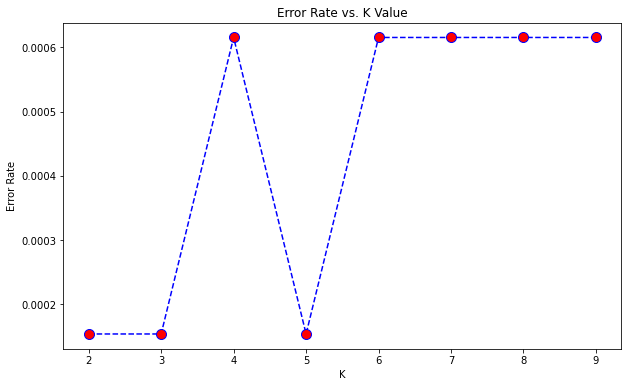

In [75]:
plt.figure(figsize=(10,6))
plt.plot(range(2,10),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [76]:
inicio = time.time()
train_pred = predict_classification(train_x.values.tolist(),train_y,5)
final = time.time()
print('Tiempo de entrenamiento:' + str(final-inicio))

100%|██████████| 6499/6499 [06:34<00:00, 16.48it/s]

Tiempo de entrenamiento:394.29108214378357


In [77]:
accuracy, precision, sensitividad, f1 = metricas(train_pred,np.array(train_y))

print('Exactitud: ',accuracy)
print('Precisión: ',precision)
print('Sensitividad: ',sensitividad)
print('f1 Score: ',f1)

Exactitud:  0.9998461301738729
Precisión:  1.0
Sensitividad:  0.9997298027560119
f1 Score:  0.9998648831239022


In [78]:
len(y_pred)

1625

In [79]:
len(test_y)


1625

In [80]:
accuracy, precision, sensitividad, f1 = metricas(y_pred,np.array(test_y))

print('Exactitud: ',accuracy)
print('Precisión: ',precision)
print('Sensitividad: ',sensitividad)
print('f1 Score: ',f1)

Exactitud:  0.9987692307692307
Precisión:  0.9960707269155207
Sensitividad:  1.0
f1 Score:  0.9980314960629921


# Regresión Logística

In [81]:
def regre_logist(x, y, theta, alpha, epocas,tolerance):
    iterations = 1
    for i in tqdm(range(epocas)):
        Z = np.dot(x,theta)
        ft = 1 / (1 + np.exp(-Z))
        dJ = (1/len(x)) * np.dot(np.transpose(x),(ft - y))
        mse.append(MSE(x, y, theta))
        vc.append(cross_entropy(x, y, theta))
        new_theta = theta - alpha * dJ
        #n_theta = [item for lista in new_theta for item in lista]
        it.append(iterations)
        # Stopping Condition
        if np.sum(abs(new_theta - theta)) < tolerance:
            print('Gradient Descent has converged')
            break    
        iterations += 1
        theta = new_theta    
    return theta, it,mse,vc

In [82]:
def clasificacion(x,theta):
    Z = np.dot(x,theta)
    ft = 1 / (1 + np.exp(-Z))
    clas = np.round(ft)
    return clas

In [83]:
def accuracy(ycalculada, yreal):
    coincidencias = np.equal(ycalculada, yreal)
    totalcoin = np.sum(coincidencias)
    porcentaje = (totalcoin/len(ycalculada))*100
    return porcentaje

In [84]:
def MSE(x, y, theta):
    h = np.dot(x,theta)
    J = np.sum((h-y)**2)/(2 * (len(h)))
    return J

In [85]:
def cross_entropy(x, y, theta):
    z = np.dot(x,theta)
    p = 1 / (1 + np.exp(-z))
    J = - np.mean(y*np.log(p) + (1-y)*np.log(1-p)) #Cross-entropy cost function
    return J

In [86]:
y_train = np.expand_dims(train_y,axis = 1)
y_train.shape

(6499, 1)

In [87]:
y_test = np.expand_dims(test_y,axis = 1)
y_test.shape

(1625, 1)

In [88]:
x_train = np.array(train_x)

In [89]:
x_train.shape
#y_train.shape

(6499, 22)

In [90]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 1, 1, 1],
       [1, 0, 2, ..., 1, 1, 2],
       ...,
       [3, 0, 4, ..., 4, 3, 3],
       [3, 0, 4, ..., 4, 3, 3],
       [3, 1, 0, ..., 4, 3, 3]], dtype=int64)

In [91]:
alpha = 0.03
epocas = 100
theta = (np.random.rand(datos1.shape[1],1))
#print(theta)
it = []
mse = []
vc =[]
tolerance = 1e-3 
print(theta)
theta_f,it,mse,vc = regre_logist(x_train, y_train, theta, alpha, epocas,tolerance)

[[9.54295692e-01]
 [2.58099762e-01]
 [1.51159934e-02]
 [8.24740826e-01]
 [3.60647432e-02]
 [8.55334283e-01]
 [5.01682206e-01]
 [3.16316796e-01]
 [5.02692713e-01]
 [9.20738479e-01]
 [8.26652799e-01]
 [5.09408743e-02]
 [3.31037164e-01]
 [7.33965913e-01]
 [4.33437642e-01]
 [7.85202424e-01]
 [4.13543500e-01]
 [7.06859284e-01]
 [6.19773045e-01]
 [5.44164864e-01]
 [9.17193452e-04]
 [2.74176655e-01]]


100%|██████████| 100/100 [00:00<00:00, 840.14it/s]


Text(0, 0.5, 'MSE')

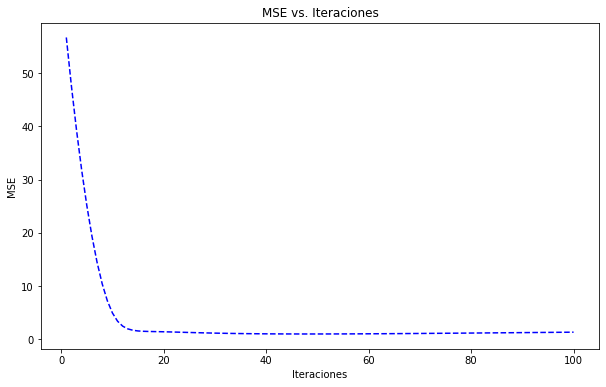

In [92]:
plt.figure(figsize=(10,6))
plt.plot(it,mse,color='blue', linestyle='dashed',
markerfacecolor='red', markersize=10)
plt.title('MSE vs. Iteraciones')
plt.xlabel('Iteraciones')
plt.ylabel('MSE')

Text(0, 0.5, 'Cross entropy')

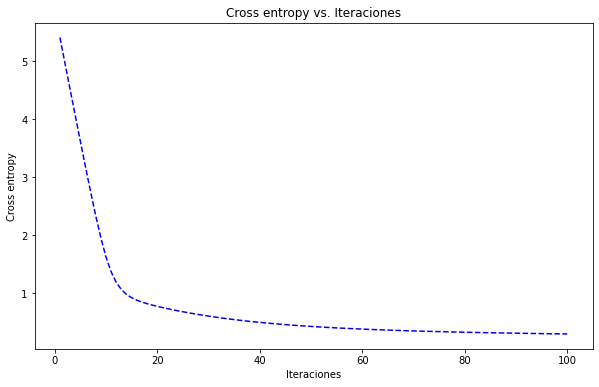

In [93]:
plt.figure(figsize=(10,6))
plt.plot(it,vc,color='blue', linestyle='dashed',
markerfacecolor='red', markersize=10)
plt.title('Cross entropy vs. Iteraciones')
plt.xlabel('Iteraciones')
plt.ylabel('Cross entropy')

In [94]:
yfinal = clasificacion(test_x, theta_f)
accuracy_final = accuracy(yfinal, y_test)
print('Exactitud de test:',accuracy_final)
loss = MSE(test_x, yfinal, theta_f)
print('MSE:',loss)
loss = cross_entropy(test_x, yfinal, theta_f)
print('Cross entropy:',loss)

Exactitud de test: 79.38461538461539
MSE: 2.795941458311271
Cross entropy: 0.21268105508269666


In [95]:
from sklearn.tree import DecisionTreeClassifier

In [96]:
mushroom_tree = DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [97]:
mushroom_tree.fit(train_x,train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [98]:
predtree = mushroom_tree.predict(test_x)

In [99]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("Precisión de los Arboles de Decisión: ", metrics.accuracy_score(test_y, predtree))

Precisión de los Arboles de Decisión:  0.9901538461538462


In [100]:
from six import StringIO

# MLP

In [101]:
from numpy.core.numeric import zeros_like

In [102]:
class capa_neuronal():
  def __init__(self, num_entradas, num_neuronas, funcion_activacion):
    self.funcion_activacion = funcion_activacion
    self.bias = np.random.rand(1, num_neuronas) * 2 - 1
    self.w = np.random.rand(num_entradas, num_neuronas) * 2 - 1

In [103]:
def compilar_red(neuronas_por_capa, funcion_activacion):
  red_neuronal = []
  for n, capa in enumerate(neuronas_por_capa[:-1]):
    red_neuronal.append(capa_neuronal(neuronas_por_capa[n], neuronas_por_capa[n + 1], funcion_activacion))
  return red_neuronal

In [104]:
def entrenar_red(x, y, red_neuronal, sigmoide_derivada, l2_derivada):

  salidas = [(None, x)]
  for n, capa in enumerate(red_neuronal):
    I = np.dot(salidas[-1][1], red_neuronal[n].w) + red_neuronal[n].bias
    _y = red_neuronal[n].funcion_activacion(I)
    salidas.append((I, _y))

  deltas = []
  for n in reversed(range(0, len(red_neuronal))):
    I = salidas[n + 1][0]
    _y = salidas[n + 1][1]
    if n == len(red_neuronal) - 1:
      deltas.insert(0, l2_derivada(_y, y) * sigmoide_derivada(_y))
    else:
      deltas.insert(0, np.dot(deltas[0], _w.T) * sigmoide_derivada(_y))
      
    _w = red_neuronal[n].w

    red_neuronal[n].bias = red_neuronal[n].bias - (np.mean(deltas[0],
                                                        axis = 0,
                                                        keepdims = True) * 
                                             learning_rate)
    red_neuronal[n].w = red_neuronal[n].w - (np.dot(salidas[n][1].T, deltas[0]) *
                                             learning_rate) 
    
    return salidas[-1][1]

In [105]:
def precision_mlp(m_entrenamiento, m_esperada):
  m1 = np.round(m_entrenamiento)
  m1[:,0] = m1[:,0]*1000
  m1[:,1] = m1[:,1]*100
  #m1[:,2] = m1[:,2]*10
  m1 = np.sum(m1, axis=1)
  m2 = zeros_like(m_esperada)
  np.copyto(m2, m_esperada)
  m2[:,0] = m2[:,0]*1000
  m2[:,1] = m2[:,1]*100
  #m2[:,2] = m2[:,2]*10
  m2 = np.sum(m2, axis=1)
  errores = []
  for v1, v2 in zip(m1,m2):
    if v1 == v2: errores.append(0)
    else: errores.append(1)
  porcentaje = 100 * sum(errores) / len(errores)
  return sum(errores), porcentaje

In [106]:
def predecir(x, red_neuronal):
  salidas = [(None, x)]
  for n, capa in enumerate(red_neuronal):
    I = np.dot(salidas[-1][1], red_neuronal[n].w) + red_neuronal[n].bias
    _y = red_neuronal[n].funcion_activacion(I)
    salidas.append((I, _y))
  return salidas[-1][1]

In [107]:
from tensorflow.keras.utils import to_categorical

In [108]:
# Funciones de activación
sigmoide = lambda x: 1 / (1 + np.e ** (-x))
sigmoide_derivada = lambda x: x * (1 - x)
relu = lambda x: x if x > 0 else 0
relu_derivada = lambda x: 0 if x <= 0 else x

In [109]:
# Funciones de coste
l2 = lambda y, y1: np.mean((y - y1) ** 2)
l2_derivada = lambda y, y1: (y - y1)

In [110]:
learning_rate = 0.1
epocas_entrenamiento = 30000
neuronas_por_capa = [22,12, 6, 3, 2]

In [111]:
y_mlp_train = to_categorical(y_train)

In [112]:
y_mlp_test = to_categorical(y_test)

In [113]:
red_neuronal = compilar_red(neuronas_por_capa, sigmoide)

In [114]:
historial_l2 = []
for i in tqdm(range(epocas_entrenamiento)):
  y_entrenamiento_1 = entrenar_red(x_train, y_mlp_train, red_neuronal, sigmoide_derivada,
                           l2_derivada)
  historial_l2.append(l2(y_entrenamiento_1, y_mlp_train))

100%|██████████| 30000/30000 [02:07<00:00, 235.94it/s]


In [115]:
y_entrenamiento_1 = np.round(y_entrenamiento_1)

In [116]:
num_errores, por100 = precision_mlp(y_entrenamiento_1, y_mlp_train)
print(f'Se obtuvo {100-por100}% de precisión con un total de {num_errores} errores.')

Se obtuvo 56.947222649638405% de precisión con un total de 2798 errores.


<function matplotlib.pyplot.show(close=None, block=None)>

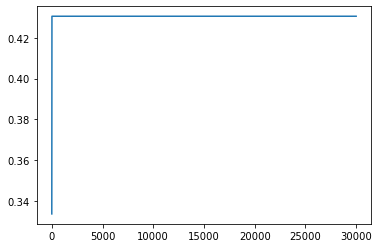

In [117]:
plt.plot(historial_l2)
plt.show

In [118]:
y_predict_m = predecir(test_x, red_neuronal)
np.round(y_predict_m)

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [119]:
m_errores, por100 = precision_mlp(y_predict_m, y_mlp_test)
print(f'Se obtuvo {100-por100}% de precisión con un total de {num_errores} errores.')

Se obtuvo 31.200000000000003% de precisión con un total de 2798 errores.
